# Airline Passenger Satisfaction

Este conjunto de datos contiene una encuesta de satisfacción de los pasajeros de las aerolíneas.
 ¿Qué factores están altamente correlacionados con un pasajero satisfecho (o insatisfecho)?

Gender: Género de los pasajeros (Femenino, Masculino)

Customer Type: El tipo de cliente (Cliente leal, cliente desleal)

Age: La edad real de los pasajeros

Type of Travel: Propósito del vuelo de los pasajeros (Viaje personal, Viaje de negocios)

Class: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)

Flight Distance: La distancia de vuelo de este viaje

Inflight wifi service: Nivel de satisfacción del servicio wifi a bordo (0:No aplica;1-5)

Departure/Arrival time convenient: Nivel de satisfacción con respecto a la conveniencia de la hora de salida/llegada

Ease of Online booking: Nivel de satisfacción de la reserva en línea

Gate location: Nivel de satisfacción de la ubicación de la puerta

Food and drink: Nivel de satisfacción de la comida y la bebida

Seat comfort: Nivel de satisfacción del embarque en línea

Online boarding: Nivel de satisfacción de la comodidad del asiento

Inflight entertainment: Nivel de satisfacción del entretenimiento a bordo

On-board service: Nivel de satisfacción del servicio a bordo

Leg room service: Nivel de satisfacción del servicio en la sala de espera

Baggage handling: Nivel de satisfacción del servicio de equipaje

Check-in service: Nivel de satisfacción del servicio de facturación

Inflight service: Nivel de satisfacción del servicio a bordo

Cleanliness: Nivel de satisfacción de la limpieza

Departure Delay in Minutes: Minutos de retraso a la salida

Arrival Delay in Minutes: Minutos de retraso a la llegada

Satisfaction: Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)



Los datos utilizados para este modelo de Machine Learning provienen de un dataset de Kaggle en el siguiente enlace:https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [124]:
df1=pd.read_csv("avion train.csv")
df2=pd.read_csv("avion test.csv") 

In [125]:
df3=pd.concat([df1, df2], axis=0)
df=df3.drop(columns=["Unnamed: 0"],axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

In [127]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Exploratory Data Analysis

In [128]:
data=df["satisfaction"].value_counts()
data

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

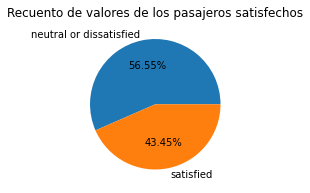

In [129]:
plt.figure(figsize=(3,3))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
plt.title('Recuento de valores de los pasajeros satisfechos')
plt.gcf();

note:los pasajeros neutrales o insatisfechos son 13.1% más que los satisfechos 

### Por sexo

In [130]:
df_sexo=df.groupby(['satisfaction','Gender'])[["satisfaction"]].count()
df_sexo

satisfaction
satisfaction            Gender              
neutral or dissatisfied Female         37630
                        Male           35822
satisfied               Female         28269
                        Male           28159

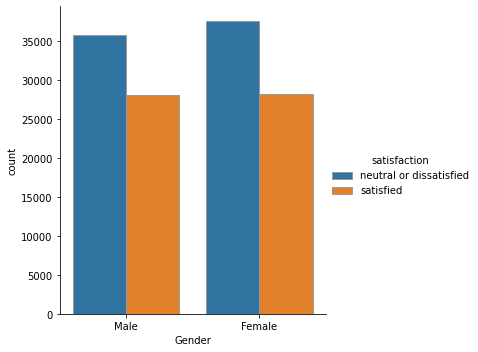

In [131]:
sns.catplot(x="Gender",
            hue="satisfaction",
            kind="count",
            data=df,
            edgecolor=".6",
            orient = "H",
            ci=None
            );

note:los hombres y las mujeres son casi el mismo, lo que lleva a que su correlación con la satisfacción del pasajero sea baja

### Por edad

In [132]:
#df_edad=df.groupby(['Age',"satisfaction"])[["satisfaction"]].count()
#df_edad

In [133]:
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

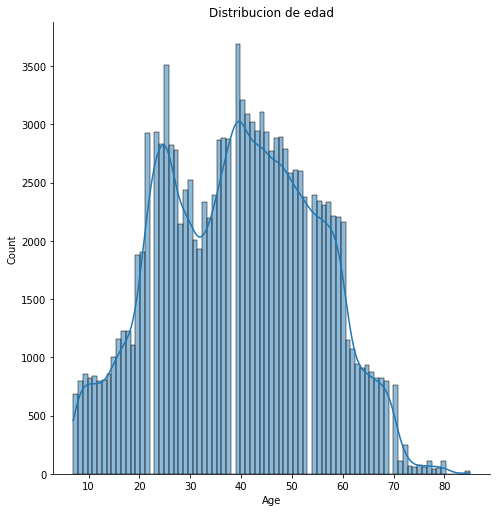

In [134]:
sns.displot(data = df['Age'], palette='mako', kde=True, height = 7)
plt.title('Distribucion de edad');

note:El principal grupo objetivo está entre los 20 y los 60 años

### Por la distancia de vuelo

In [135]:
df['Flight Distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

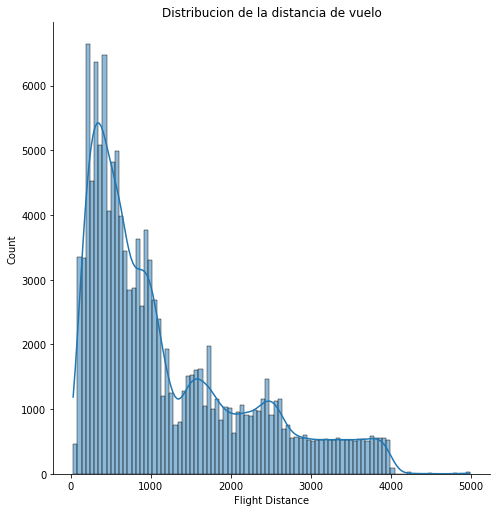

In [136]:
sns.displot(data = df['Flight Distance'], palette='mako', kde=True, height = 7)
plt.title('Distribucion de la distancia de vuelo');

note:Se concentra principalmente en vuelos de pequeña distancia, ya que el recuento de kilómetros de los vuelos de pequeños distancia es mucho mayor que el de los demás.

### Por el tipo de cliente

In [137]:
df_cus=df.groupby(['satisfaction','Customer Type'])[["satisfaction"]].count()
df_cus

satisfaction
satisfaction            Customer Type                  
neutral or dissatisfied Loyal Customer            55372
                        disloyal Customer         18080
satisfied               Loyal Customer            50728
                        disloyal Customer          5700

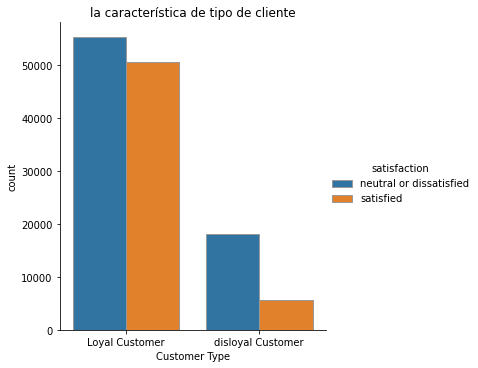

In [138]:
sns.catplot(x="Customer Type",
            hue="satisfaction",
            kind="count",
            data=df,
            edgecolor=".6",
            orient = "H",
            ci=None
            );
plt.title('la característica de tipo de cliente');

note: Clientes leales mucho más que clientes desleales, pero entre los clientes leales la insatisfacción es mayor que la satisfacción.

### Por el tipo de viaje

In [139]:
df_cus=df.groupby(['satisfaction','Type of Travel'])[["satisfaction"]].count()
df_cus

satisfaction
satisfaction            Type of Travel               
neutral or dissatisfied Business travel         37337
                        Personal Travel         36115
satisfied               Business travel         52356
                        Personal Travel          4072

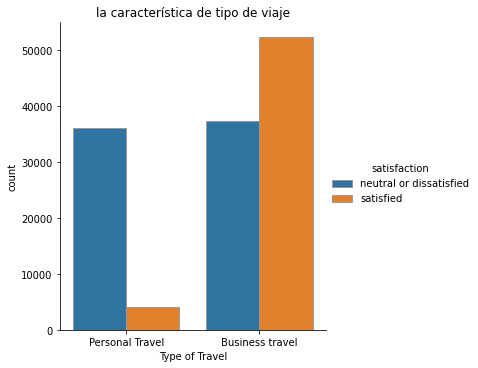

In [140]:
sns.catplot(x="Type of Travel",
            hue="satisfaction",
            kind="count",
            data=df,
            edgecolor=".6",
            orient = "H",
            ci=None
            );
plt.title('la característica de tipo de viaje');

note:
Viajes de negocios más que personales.

En los viajes de negocios, los clientes satisfechos son mucho más que los insatisfechos y eso es muy bueno, pero el número de clientes insatisfechos no es bajo.

En los viajes de personales,La satisfacción con los viajes personales es demasiado baja y esto es un problema.

### Por clase

In [141]:
df_clase=df.groupby(['satisfaction','Class'])[["satisfaction"]].count()
df_clase

satisfaction
satisfaction            Class                 
neutral or dissatisfied Business         18994
                        Eco              47366
                        Eco Plus          7092
satisfied               Business         43166
                        Eco              10943
                        Eco Plus          2319

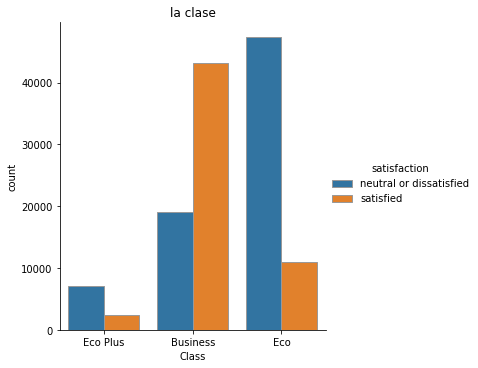

In [142]:
sns.catplot(x="Class",
            hue="satisfaction",
            kind="count",
            data=df,
            edgecolor=".6",
            orient = "H",
            ci=None
            );
plt.title('la clase');

note: Casi nadie utiliza la clase Eco Plus. genenalmente se seleciona Eco.

## Data processing

In [143]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Tratar los outliers

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


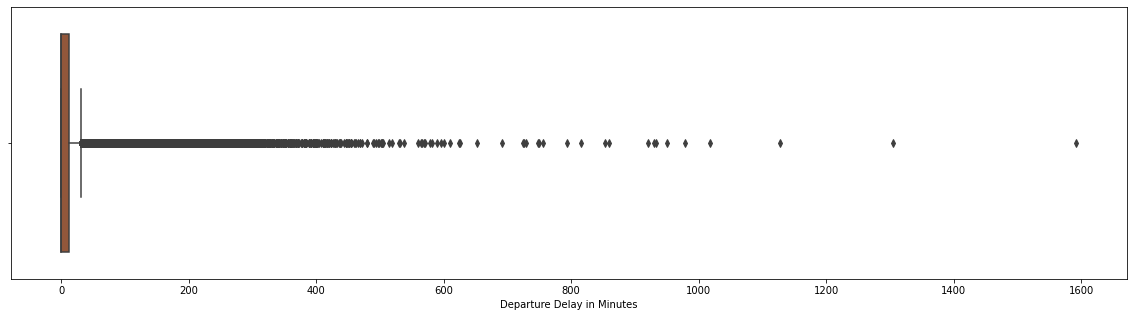

In [144]:
plt.figure(figsize=(20,5))
sns.boxplot(df["Departure Delay in Minutes"], color="sienna");

In [145]:
df['Departure Delay in Minutes'].describe(percentiles=[0.01,0.05,0.10,0.25,0.75,0.90,0.95,0.975,0.99])

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
90%          44.000000
95%          77.000000
97.5%       118.000000
99%         180.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [146]:
DepartureDelayinMinutes_upper = df['Departure Delay in Minutes'].quantile(0.99)
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes'] > DepartureDelayinMinutes_upper,DepartureDelayinMinutes_upper,df['Departure Delay in Minutes'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


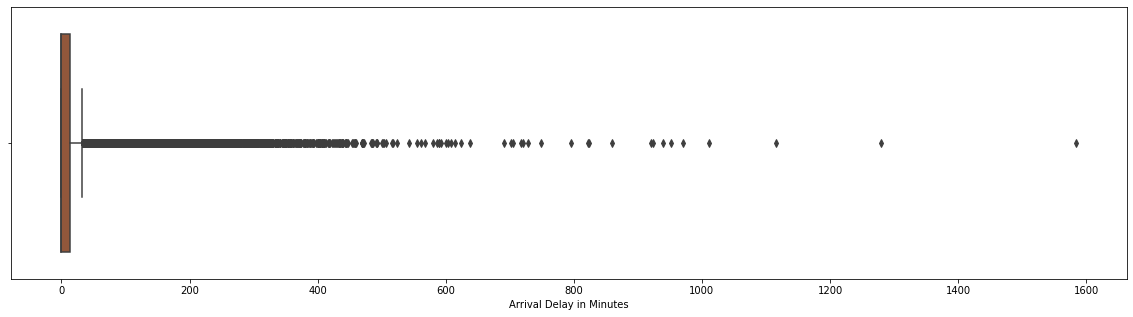

In [147]:
plt.figure(figsize=(20,5))
sns.boxplot(df["Arrival Delay in Minutes"], color="sienna");

In [148]:
df['Arrival Delay in Minutes'].describe(percentiles=[0.01,0.05,0.10,0.25,0.75,0.90,0.95,0.975,0.99])

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
90%          44.000000
95%          78.000000
97.5%       120.000000
99%         182.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [149]:
ArrivalDelayinMinutes_upper = df['Arrival Delay in Minutes'].quantile(0.99)
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes'] > ArrivalDelayinMinutes_upper,ArrivalDelayinMinutes_upper,df['Arrival Delay in Minutes'])

Transformar algunas de las columnas

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     12988

In [151]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [152]:
le.fit(df['Gender'])
df['Gender_encoded'] = le.transform(df['Gender'])

In [153]:
dic = {'Loyal Customer' : 1, 'disloyal Customer': 0}
df['Customer Type'] = df['Customer Type'].map(dic)

In [154]:
dic = {'Business travel' : 1, 'Personal Travel': 0}
df['Type of Travel'] = df['Type of Travel'].map(dic)

In [155]:
dic = {'Business' : 2, 'Eco Plus': 1, 'Eco': 0}
df['Class'] = df['Class'].map(dic)

In [156]:
dic = {'satisfied' : 1, 'neutral or dissatisfied': 0}
df['satisfaction'] = df['satisfaction'].map(dic)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_encoded
0,70172,Male,1,13,0,1,460,3,4,3,...,4,3,4,4,5,5,25.0,18.0,0,1
1,5047,Male,0,25,1,2,235,3,2,3,...,1,5,3,1,4,1,1.0,6.0,0,1
2,110028,Female,1,26,1,2,1142,2,2,2,...,4,3,4,4,4,5,0.0,0.0,1,0
3,24026,Female,1,25,1,2,562,2,5,5,...,2,5,3,1,4,2,11.0,9.0,0,0
4,119299,Male,1,61,1,2,214,3,3,3,...,3,4,4,3,3,3,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,0,34,1,2,526,3,3,3,...,3,2,4,4,5,4,0.0,0.0,0,1
25972,71167,Male,1,23,1,2,646,4,4,4,...,4,5,5,5,5,4,0.0,0.0,1,1
25973,37675,Female,1,17,0,0,828,2,5,1,...,4,3,4,5,4,2,0.0,0.0,0,0
25974,90086,Male,1,14,1,2,1127,3,3,3,...,3,2,5,4,5,4,0.0,0.0,1,1


Trata los NAN

In [157]:
df.fillna(value={"Arrival Delay in Minutes":df["Arrival Delay in Minutes"].mean()}, inplace = True )

### correlacion

In [158]:
df.corr()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_encoded
id,1.000000,-0.001467,0.020322,0.000935,0.097509,0.095504,-0.023096,-0.002192,0.013400,-0.000113,...,0.055502,0.044088,0.074569,0.079325,0.078793,0.024048,-0.015932,-0.037693,0.013182,-0.001361
Customer Type,-0.001467,1.000000,0.284172,-0.308236,0.105641,0.226021,0.005757,0.206873,0.018059,-0.004465,...,0.054172,0.046841,-0.024874,0.031243,-0.023292,0.081302,-0.005448,-0.006056,0.186017,0.030958
Age,0.020322,0.284172,1.000000,0.044808,0.140504,0.099459,0.016116,0.036960,0.022565,-0.000398,...,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.007739,-0.009986,0.134091,0.008996
Type of Travel,0.000935,-0.308236,0.044808,1.000000,0.545447,0.266792,0.105865,-0.257102,0.134078,0.029869,...,0.059794,0.139612,0.033012,-0.016247,0.023538,0.084615,0.006173,0.005831,0.449861,-0.009503
Class,0.097509,0.105641,0.140504,0.545447,1.000000,0.450814,0.036869,-0.089976,0.107537,0.005861,...,0.211103,0.206129,0.161364,0.151299,0.155864,0.138491,-0.011671,-0.016537,0.492947,0.005774
Flight Distance,0.095504,0.226021,0.099459,0.266792,0.450814,1.000000,0.006701,-0.018914,0.065165,0.005520,...,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,-0.000980,-0.005490,0.298085,0.003616
Inflight wifi service,-0.023096,0.005757,0.016116,0.105865,0.036869,0.006701,1.000000,0.344915,0.714807,0.338573,...,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.018300,-0.020604,0.283460,0.005901
Departure/Arrival time convenient,-0.002192,0.206873,0.036960,-0.257102,-0.089976,-0.018914,0.344915,1.000000,0.437620,0.447510,...,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000036,-0.002020,-0.054270,0.008995
Ease of Online booking,0.013400,0.018059,0.022565,0.134078,0.107537,0.065165,0.714807,0.437620,1.000000,0.460041,...,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005965,-0.007927,0.168877,0.005893
Gate location,-0.000113,-0.004465,-0.000398,0.029869,0.005861,0.005520,0.338573,0.447510,0.460041,1.000000,...,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.007332,0.006721,-0.002793,-0.000863


<AxesSubplot:>

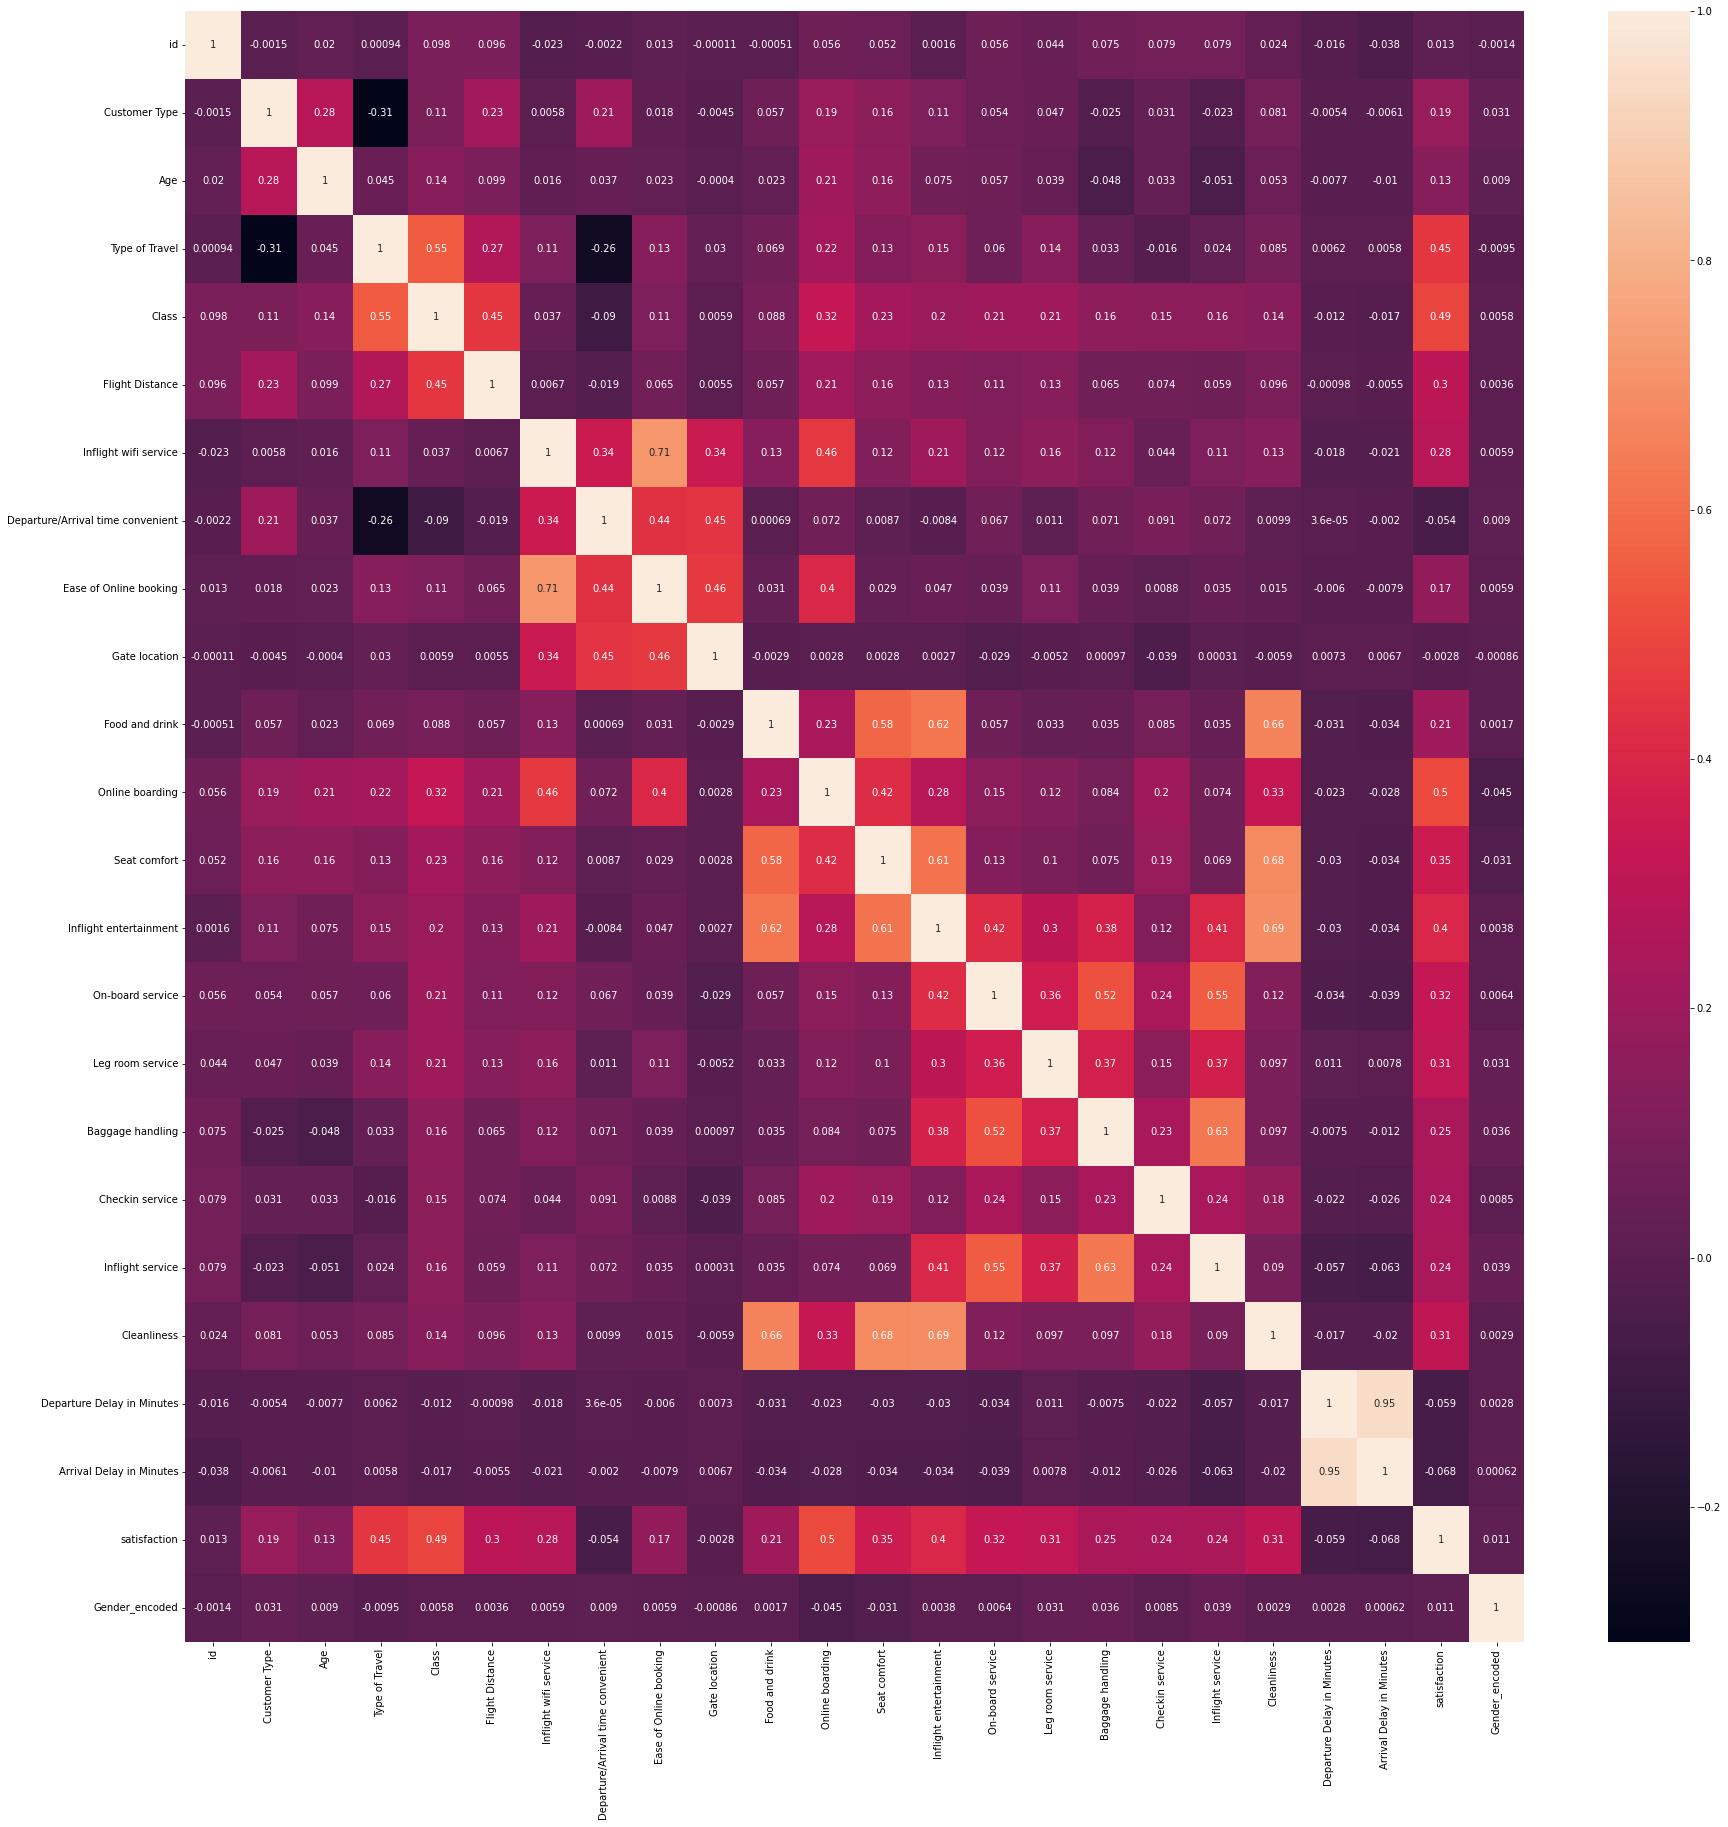

In [159]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

note:

Existe una correlación significativa entre 'Departure Delay in Minutes' y 'Arrival Delay in Minutes', por lo que eliminaremos una de las dos features para evitar el problema de la multicolinealidad.

los coeficientes entre [-0.1, +0.1] respecto a nuestro target, suelen ser variables que no tiene nada que ver con el mismo. vamos a eliminarlos.

## Machine Learning

## Train test split

In [160]:
X = df.drop(columns=['satisfaction','id','Gender','Gender_encoded','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient','Gate location'])
y = df['satisfaction']

In [161]:
#y.to_csv("test.csv")

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [163]:
#X_train["satisfaction"]=y_train

In [164]:
#X_test["satisfaction"]=y_test

In [165]:
#X_train.to_csv("train.csv")

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(103904, 17)
(25976, 17)
(103904,)
(25976,)


In [87]:
from sklearn.preprocessing import StandardScaler
# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
scaler = StandardScaler()
scaler.fit(X_train)

# Utilizo los datos de train para escalar train y test.
X_train_scale= scaler.transform(X_train)
X_test_scale= scaler.transform(X_test)

### Entrenar los modelos y elegir el mejor moldelo

LogisticRegression

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
seed=7

In [89]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=seed)

log_params = {
               "max_iter": [50,100,500],
               "C": [0.1, 0.5, 1.0, 5.0]
}
log_gs = GridSearchCV(model, log_params , cv=3, n_jobs=-1,scoring='accuracy',verbose=2)

log_gs.fit(X_train_scale, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ................................C=0.1, max_iter=100; total time=   0.2s
[CV] END .................................C=0.1, max_iter=50; total time=   0.2s
[CV] END .................................C=0.1, max_iter=50; total time=   0.2s
[CV] END .................................C=0.1, max_iter=50; total time=   0.2s
[CV] END ................................C=0.1, max_iter=500; total time=   0.2s
[CV] END ................................C=0.1, max_iter=100; total time=   0.2s
[CV] END ................................C=0.1, max_iter=100; total time=   0.3s
[CV] END ................................C=0.1, max_iter=500; total time=   0.2s
[CV] END ................................C=0.1, max_iter=500; total time=   0.2s
[CV] END .................................C=0.5, max_iter=50; total time=   0.2s
[CV] END .................................C=0.5, max_iter=50; total time=   0.2s
[CV] END .................................C=0.5,

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=7), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0, 5.0], 'max_iter': [50, 100, 500]},
             scoring='accuracy', verbose=2)

In [600]:
print(log_gs.best_estimator_)
print(log_gs.best_score_)
print(log_gs.best_params_)

LogisticRegression(C=5.0, max_iter=50, random_state=7)
0.8726709061447857
{'C': 5.0, 'max_iter': 50}


In [601]:
y_pred = log_gs.best_estimator_.predict(X_test_scale)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Accuracy 0.8697259008315368
Precision 0.8675312644742936
Recall 0.827369909002562
ROC 0.8649028026284559


SVC

In [603]:
from sklearn.svm import SVC

model=SVC(random_state=seed)

svm_params = {
              'C': [0.05,0.1,0.3],
              'kernel': ['linear','rbf','sigmoid']
}
svm_gs = GridSearchCV(model, svm_params , cv=3, n_jobs=-1,scoring='accuracy',verbose=2)

svm_gs.fit(X_train_scale, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..............................C=0.05, kernel=linear; total time= 3.5min
[CV] END ..............................C=0.05, kernel=linear; total time= 3.5min
[CV] END ..............................C=0.05, kernel=linear; total time= 3.6min
[CV] END .................................C=0.05, kernel=rbf; total time= 4.4min
[CV] END .................................C=0.05, kernel=rbf; total time= 3.8min
[CV] END .................................C=0.05, kernel=rbf; total time= 3.8min
[CV] END .............................C=0.05, kernel=sigmoid; total time= 3.3min
[CV] END .............................C=0.05, kernel=sigmoid; total time= 4.1min
[CV] END ...............................C=0.1, kernel=linear; total time= 3.5min
[CV] END ...............................C=0.1, kernel=linear; total time= 3.5min
[CV] END ...............................C=0.1, kernel=linear; total time= 3.5min
[CV] END .............................C=0.05, ker

GridSearchCV(cv=3, estimator=SVC(random_state=7), n_jobs=-1,
             param_grid={'C': [0.05, 0.1, 0.3],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [604]:
print(svm_gs.best_estimator_)
print(svm_gs.best_score_)
print(svm_gs.best_params_)

SVC(C=0.3, random_state=7)
0.9485582789105692
{'C': 0.3, 'kernel': 'rbf'}


In [605]:
y_pred = svm_gs.best_estimator_.predict(X_test_scale)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Accuracy 0.9484909146904835
Precision 0.9521609132916553
Recall 0.9284389080307448
ROC 0.9462075825546369


RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=seed)

rf_params = { 
              'n_estimators': [200,250,300,350,400],
              'max_depth': [None],
              "max_features": ["sqrt", 3, 4],            
}

rf_gs = GridSearchCV(model, rf_params , cv=3, n_jobs=-1,scoring='accuracy',verbose=2)

rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  56.8s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  56.9s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  57.0s
[CV] END max_depth=None, max_features=sqrt, n_estimators=250; total time= 1.2min
[CV] END max_depth=None, max_features=sqrt, n_estimators=250; total time= 1.2min
[CV] END max_depth=None, max_features=sqrt, n_estimators=250; total time= 1.2min
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time= 1.5min
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time= 1.5min
[CV] END max_depth=None, max_features=sqrt, n_estimators=300; total time= 1.3min
[CV] END max_depth=None, max_features=sqrt, n_estimators=350; total time= 1.6min
[CV] END max_depth=None, max_features=sqrt, n_estimators=350; total time= 1.5min
[CV] END max_depth=None, max_features=sqrt, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 3, 4],
                         'n_estimators': [200, 250, 300, 350, 400]},
             scoring='accuracy', verbose=2)

In [55]:
print(rf_gs.best_estimator_)
print(rf_gs.best_score_)
print(rf_gs.best_params_)

RandomForestClassifier(max_features='sqrt', n_estimators=300, random_state=7)
0.9622536093626132
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}


In [56]:
y_pred = rf_gs.best_estimator_.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Accuracy 0.9620803818909763
Precision 0.9737759031725656
Recall 0.9382454280413464
ROC 0.9593662836461082


GradientBoostingClassifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=seed)

gb_params =  {
              'n_estimators': [50,100,150],
              'learning_rate': [0.1,0.3,0.5,0.7],
              'max_depth': [4,5,6]
}
gb_gs = GridSearchCV(model, gb_params , cv=3, n_jobs=-1,scoring='accuracy',verbose=2)

gb_gs.fit(X_train_scale, y_train)     

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=50; total time=  21.6s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=50; total time=  21.6s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=50; total time=  21.9s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  46.5s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  50.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=  50.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=150; total time= 1.2min
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=  23.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=150; total time= 1.1min
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=  29.7s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=  32.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_e

KeyboardInterrupt: 

In [608]:
print(gb_gs.best_estimator_)
print(gb_gs.best_score_)
print(gb_gs.best_params_)

GradientBoostingClassifier(max_depth=6, n_estimators=150, random_state=7)
0.9622632413192478
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}


In [609]:
y_pred = gb_gs.best_estimator_.predict(X_test_scale)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Accuracy 0.9617339082229751
Precision 0.9721942742156773
Recall 0.9390405512854493
ROC 0.9591498041956344


KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier()

knn_params = { 
              "n_neighbors": [3,5,7,9],       
             
}
knn_gs = GridSearchCV(model, knn_params , cv=3, n_jobs=-1,scoring='accuracy',verbose=2)

knn_gs.fit(X_train_scale, y_train) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ......................................n_neighbors=3; total time= 2.9min
[CV] END ......................................n_neighbors=3; total time= 2.9min
[CV] END ......................................n_neighbors=3; total time= 3.0min
[CV] END ......................................n_neighbors=5; total time= 3.0min
[CV] END ......................................n_neighbors=5; total time= 2.6min
[CV] END ......................................n_neighbors=7; total time= 2.6min
[CV] END ......................................n_neighbors=5; total time= 2.8min
[CV] END ......................................n_neighbors=7; total time= 2.8min
[CV] END ......................................n_neighbors=9; total time= 2.5min
[CV] END ......................................n_neighbors=7; total time= 2.6min
[CV] END ......................................n_neighbors=9; total time= 2.5min
[CV] END ......................................n_

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy',
             verbose=2)

In [46]:
print(knn_gs.best_estimator_)
print(knn_gs.best_score_)
print(knn_gs.best_params_)

KNeighborsClassifier(n_neighbors=9)
0.9337657673931047
{'n_neighbors': 9}


In [47]:
y_pred = knn_gs.best_estimator_.predict(X_test_scale)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Accuracy 0.9353634123806591
Precision 0.9599236641221374
Recall 0.8887710928527255
ROC 0.9300579214007777


## Resultado

In [57]:
data={'accuracy':{"log":0.8697259008315368,"svm":0.9484909146904835,"rf":0.9620803818909763,"gb":0.9617339082229751,"knn":0.9353634123806591}}
df=pd.DataFrame(data)
df.sort_values("accuracy", ascending=False)

,accuracy
rf,0.962080
gb,0.961734
svm,0.948491
knn,0.935363
log,0.869726


El modelo escogido es el RandomForestClassifier debido a que es el que mejor generaliza ante datos nuevos, teniendo la mejor métrica de Accuracy ,con parametros {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300} .

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=seed, n_estimators=300,
              max_depth=None,max_features="sqrt")


rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=300, random_state=7)

In [168]:
y_pred_best= rf_model.predict(X_test)

In [169]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14657
           1       0.97      0.94      0.96     11319

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [170]:
accuracy_score(y_test, y_pred_best)

0.9620803818909763

<AxesSubplot:>

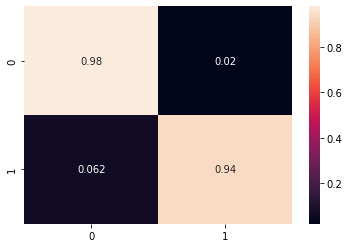

In [643]:
confusion_matrix(y_test,y_pred_best)
sns.heatmap(confusion_matrix(y_test,y_pred_best, normalize='true'), annot=True)

#### Random Forest features importances 

In [193]:
#Obtenemos el feature_importances
rf_model.feature_importances_

array([0.03688222, 0.03786312, 0.10010486, 0.103371  , 0.04314536,
       0.14943304, 0.03925736, 0.0122799 , 0.19977983, 0.04466503,
       0.06407564, 0.02876914, 0.03823528, 0.02705737, 0.02728838,
       0.02399593, 0.02379656])

In [196]:
fi_rnd= pd.DataFrame(rf_model.feature_importances_,
                        X.columns,
                        columns = ["Feature imp. RND"]).sort_values("Feature imp. RND", ascending=False)
fi_rnd

,Feature imp. RND
Online boarding,0.199780
Inflight wifi service,0.149433
Class,0.103371
Type of Travel,0.100105
Inflight entertainment,0.064076
Seat comfort,0.044665
Flight Distance,0.043145
Ease of Online booking,0.039257
Leg room service,0.038235
Age,0.037863


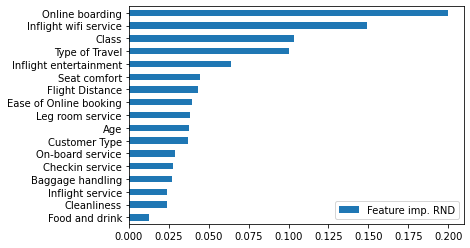

In [656]:
#Visualizamos
fi_rnd.sort_values("Feature imp. RND").plot.barh(y='Feature imp. RND');

## Pickle

LogisticRegression(C=5.0, max_iter=50, random_state=7)
0.8726709061447857
{'C': 5.0, 'max_iter': 50}

In [181]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(random_state=seed,max_iter=50,
               C= 5.0)

log_model.fit(X_train_scale, y_train)

LogisticRegression(C=5.0, max_iter=50, random_state=7)

In [174]:
from sklearn.svm import SVC

svm_model=SVC(random_state=seed,C=0.3,
              kernel='rbf')

svm_model.fit(X_train_scale, y_train)

SVC(C=0.3, random_state=7)

In [182]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=seed,n_estimators=150,
              learning_rate=0.1)

gb_model.fit(X_train_scale, y_train)   

GradientBoostingClassifier(n_estimators=150, random_state=7)

In [183]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier(n_neighbors=9)

knn_model.fit(X_train_scale, y_train) 

KNeighborsClassifier(n_neighbors=9)

In [187]:
# Guardar el modelo
import pickle

with open('my_model_knn.model', 'wb') as archivo_salida:
    pickle.dump(knn_model, archivo_salida)

In [651]:
# Para volver a leer el modelo
with open('my_model.model', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [646]:
loaded_model.score(X_test,y_test)

0.9620803818909763

In [647]:
loaded_model.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0])